# Chap 06

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import math

import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import pystan

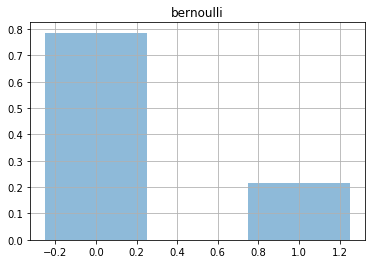

In [60]:
xs = stats.bernoulli.rvs(p=0.2, size=1000)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(xs, bins=np.linspace(-0.5, 1.5, 3), alpha=0.5, normed=True, rwidth=0.5)
ax.set_title('bernoulli')
ax.grid(True)

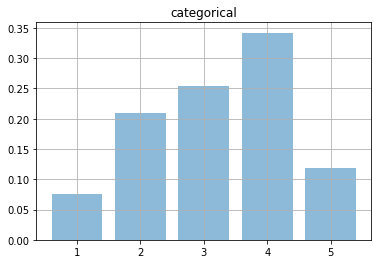

In [57]:
p = [0.1, 0.2, 0.25, 0.35, 0.1]
xs = stats.multinomial.rvs(n=1, p=p, size=1000)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(range(1, 6), xs.sum(axis=0) / xs.sum(), alpha=0.5)
ax.set_title('categorical')
ax.grid(True)

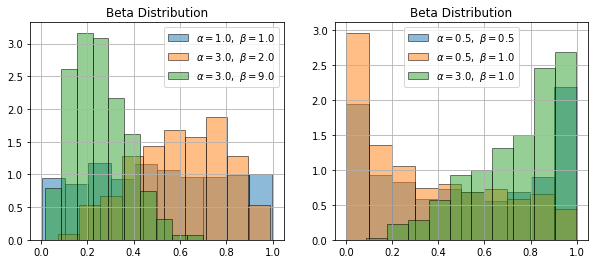

In [132]:
alpha_values = [[1.0, 3.0, 3.0], [0.5, 0.5, 3.0]]
beta_values = [[1.0, 2.0, 9.0], [0.5, 1.0, 1.0]]

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

for i, (alphas, betas) in enumerate(zip(alpha_values, beta_values)):
    for a, b in zip(alphas, betas):
        xs = stats.beta.rvs(a, b, size=1000)
        ax[i].hist(xs, normed=True, alpha=0.5, edgecolor='black', label=r'$\alpha=%.1f,\ \beta=%.1f$' % (a, b))
        ax[i].set_title('Beta Distribution')
        ax[i].grid(True)
        ax[i].legend(loc=0)


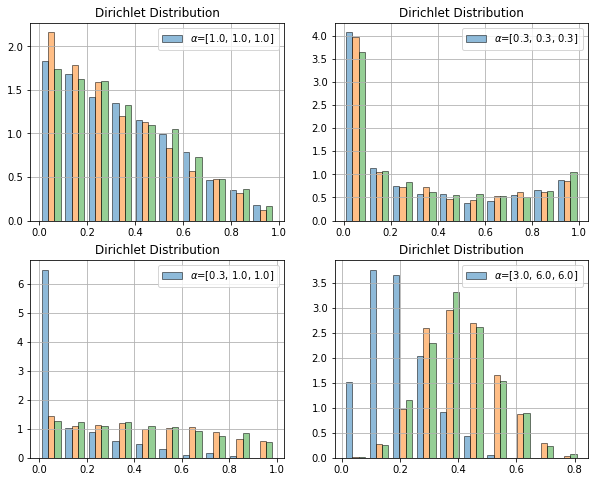

In [133]:
alpha_values = [[1.0, 1.0, 1.0], [0.3, 0.3, 0.3], [0.3, 1.0, 1.0], [3.0, 6.0, 6.0]]

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

for alpha, ax in zip(alpha_values, axs.reshape(-1)):
    xs = stats.dirichlet.rvs(alpha, size=1000)
    ax.hist(xs, normed=True, alpha=0.5, edgecolor='black', label=r'$\alpha$=%s ' % alpha)
    ax.set_title('Dirichlet Distribution')
    ax.grid(True)
    ax.legend(loc=0)

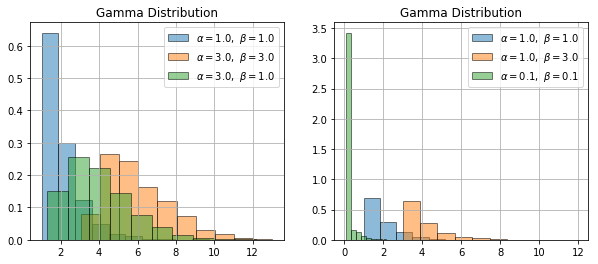

In [141]:
alpha_values = [[1.0, 3.0, 3.0], [1.0, 1.0, 0.1]]
beta_values = [[1.0, 3.0, 1.0], [1.0, 3.0, 0.1]]

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
for alphas, betas, ax in zip(alpha_values, beta_values, axs.reshape(-1)):
    for a, b in zip(alphas, betas):
        xs = stats.gamma.rvs(a, b, size=1000)
        ax.hist(xs, normed=True, alpha=0.5, edgecolor='black', label=r'$\alpha=%.1f,\ \beta=%.1f$' % (a, b))
        ax.set_title('Gamma Distribution')
        ax.grid(True)
        ax.legend(loc=0)

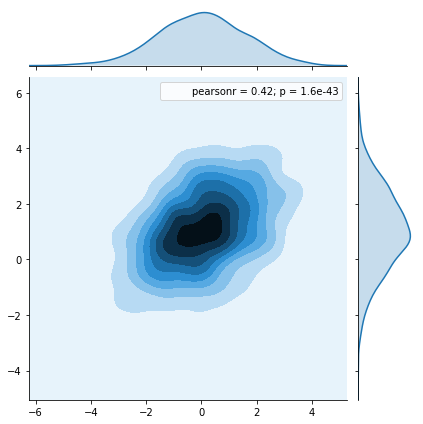

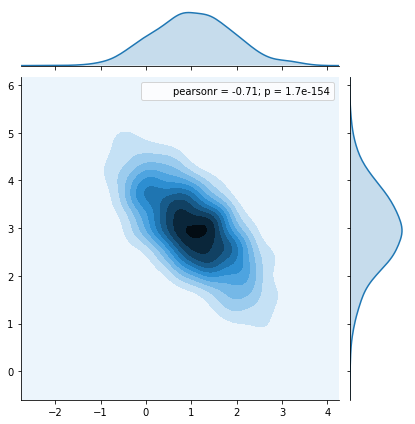

In [165]:
mu_values = [[0.0, 1.0], [1.0, 3.0]]
cov_values = [np.array([[1.5 * 1.5, 1.5 * 1.5 * 0.4], [1.5 * 1.5 * 0.4, 1.5 * 1.5]]), 
             np.array([[1.5 * 0.5, 1.5 * 0.5 * -0.7], [1.5 * 0.5 * -0.7, 1.5 * 0.5]])]

for mus, covs in zip(mu_values, cov_values):
    xs = stats.multivariate_normal.rvs(mus, covs, size=1000)
    sns.jointplot(x=xs[:,0], y=xs[:, 1], kind="kde")

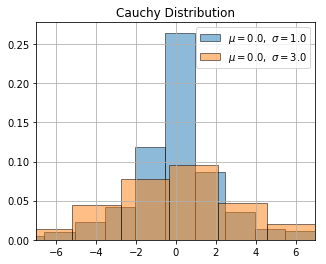

In [186]:
mu_values = [0.0, 0.0]
sigma_values = [1.0, 3.0]

fig, ax = plt.subplots(1, 1, figsize=(5, 4))
for mu, sigma in zip(mu_values, sigma_values):
    xs = stats.cauchy.rvs(mu, sigma, size=1000)
    ax.hist(xs, bins=1000, normed=True, alpha=0.5, edgecolor='black', label=r'$\mu=%.1f,\ \sigma=%.1f$' % (mu, sigma))
    ax.set_title('Cauchy Distribution')
    ax.set_xlim(-7, 7)
    ax.grid(True)
    ax.legend(loc=0)

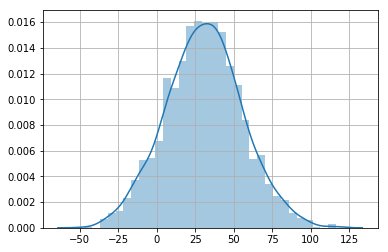

In [199]:
y1 = np.random.normal(loc=50, scale=20, size=2000)
y2 = np.random.normal(loc=20, scale=15, size=2000)
y = y1 - y2

sns.distplot(y)
plt.grid(True)